# Comparing Sports Primes: Analysis of Peak Performance Across Major American Sports

This notebook analyzes the "prime" years of athletes across the four major American sports: MLB, NFL, NBA, and NHL.

## Project Overview

We'll examine when athletes reach their peak performance by analyzing historical data from players who started their careers around 2000 and ended around 2015 (year range is just a test range for now)

## Defining "Prime"

The period of time in a sports player's career when they play their best, statistically.

**Note:** There will be outliers with Hall of Famers and players who play longer than average. The average player in all major sports has a significantly shorter career than the average starting lineup player.

## Setup and Imports

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")

Libraries imported successfully!


## MLB Analysis: Hits per At-Bat vs Career Year

We'll analyze MLB batting performance using the Lahman Baseball Database (Batting.csv).

Our approach:
1. Load historical batting data from Batting.csv
2. Identify players with exactly 15-year careers
3. Filter for regular players (avg >= 100 at-bats per season)
4. Analyze hits per at-bat by career year (Year 1 through Year 15)
5. Identify when players typically reach their prime performance

In [55]:
# Load Batting.csv data
print("Loading Batting.csv...")
batting = pd.read_csv('Batting.csv')

print(f"Dataset loaded: {batting.shape[0]:,} rows, {batting.shape[1]} columns")
print(f"Year range: {batting['yearID'].min()} - {batting['yearID'].max()}")
print("\nFirst few rows:")
batting.head()

Loading Batting.csv...
Dataset loaded: 101,332 rows, 22 columns
Year range: 1871 - 2015

First few rows:


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [56]:
# Find players with exactly 15-year careers
print("Identifying players with 15-year careers...")

# Count number of seasons for each player
career_lengths = batting.groupby('playerID')['yearID'].nunique()

# Get players with exactly 15 years
players_15_years = career_lengths[career_lengths == 15].index.tolist()
print(f"Found {len(players_15_years)} players with exactly 15-year careers")

# Aggregate stats by player-year (some players played for multiple teams in a season)
batting_15 = batting[batting['playerID'].isin(players_15_years)].copy()
batting_15_agg = batting_15.groupby(['playerID', 'yearID']).agg({
    'G': 'sum',
    'AB': 'sum',
    'H': 'sum',
    'R': 'sum',
    'HR': 'sum',
    'RBI': 'sum'
}).reset_index()

# Filter for regular players (at least 100 AB per season on average)
player_avg_ab = batting_15_agg.groupby('playerID')['AB'].mean()
regular_players = player_avg_ab[player_avg_ab >= 100].index.tolist()

print(f"Found {len(regular_players)} regular players (avg >= 100 AB/season) with 15-year careers")

# Filter to regular players only
batting_regular = batting_15_agg[batting_15_agg['playerID'].isin(regular_players)].copy()

# Verify all have exactly 15 seasons
player_season_counts = batting_regular.groupby('playerID').size()
print(f"All players have exactly 15 seasons: {(player_season_counts == 15).all()}")
print(f"\nTotal player-seasons in analysis: {len(batting_regular)}")
print(f"Number of players: {batting_regular['playerID'].nunique()}")

Identifying players with 15-year careers...
Found 270 players with exactly 15-year careers
Found 165 regular players (avg >= 100 AB/season) with 15-year careers
All players have exactly 15 seasons: True

Total player-seasons in analysis: 2475
Number of players: 165


In [57]:
# Calculate career year (1-15) and performance metrics
print("Calculating career year and performance metrics...")

# Sort by player and year, then add career year counter
batting_regular = batting_regular.sort_values(['playerID', 'yearID'])
batting_regular['career_year'] = batting_regular.groupby('playerID').cumcount() + 1

# Calculate hits per at-bat
batting_regular['hits_per_ab'] = batting_regular['H'] / batting_regular['AB']

# Remove any rows with 0 at-bats (edge case)
batting_regular = batting_regular[batting_regular['AB'] > 0]

print(f"Final dataset: {len(batting_regular)} player-seasons")
print("\nSample data:")
print(batting_regular[['playerID', 'yearID', 'career_year', 'AB', 'H', 'hits_per_ab']].head(15))

# Calculate statistics by career year
print("\n" + "="*60)
print("Average Performance by Career Year")
print("="*60)
avg_by_career_year = batting_regular.groupby('career_year')['hits_per_ab'].agg(['mean', 'std', 'count'])
print(avg_by_career_year)

# Identify peak performance
peak_year = avg_by_career_year['mean'].idxmax()
peak_value = avg_by_career_year['mean'].max()
print(f"\n*** Peak Performance: Career Year {peak_year} (Hits/AB: {peak_value:.4f}) ***")

Calculating career year and performance metrics...
Final dataset: 2474 player-seasons

Sample data:
     playerID  yearID  career_year     AB      H  hits_per_ab
0   ainsmed01    1910            1  104.0   20.0     0.192308
1   ainsmed01    1911            2  149.0   33.0     0.221477
2   ainsmed01    1912            3  186.0   42.0     0.225806
3   ainsmed01    1913            4  229.0   49.0     0.213974
4   ainsmed01    1914            5  151.0   34.0     0.225166
5   ainsmed01    1915            6  120.0   24.0     0.200000
6   ainsmed01    1916            7  100.0   17.0     0.170000
7   ainsmed01    1917            8  350.0   67.0     0.191429
8   ainsmed01    1918            9  292.0   62.0     0.212329
9   ainsmed01    1919           10  364.0   99.0     0.271978
10  ainsmed01    1920           11  186.0   43.0     0.231183
11  ainsmed01    1921           12  160.0   45.0     0.281250
12  ainsmed01    1922           13  379.0  111.0     0.292876
13  ainsmed01    1923           

Creating visualizations...


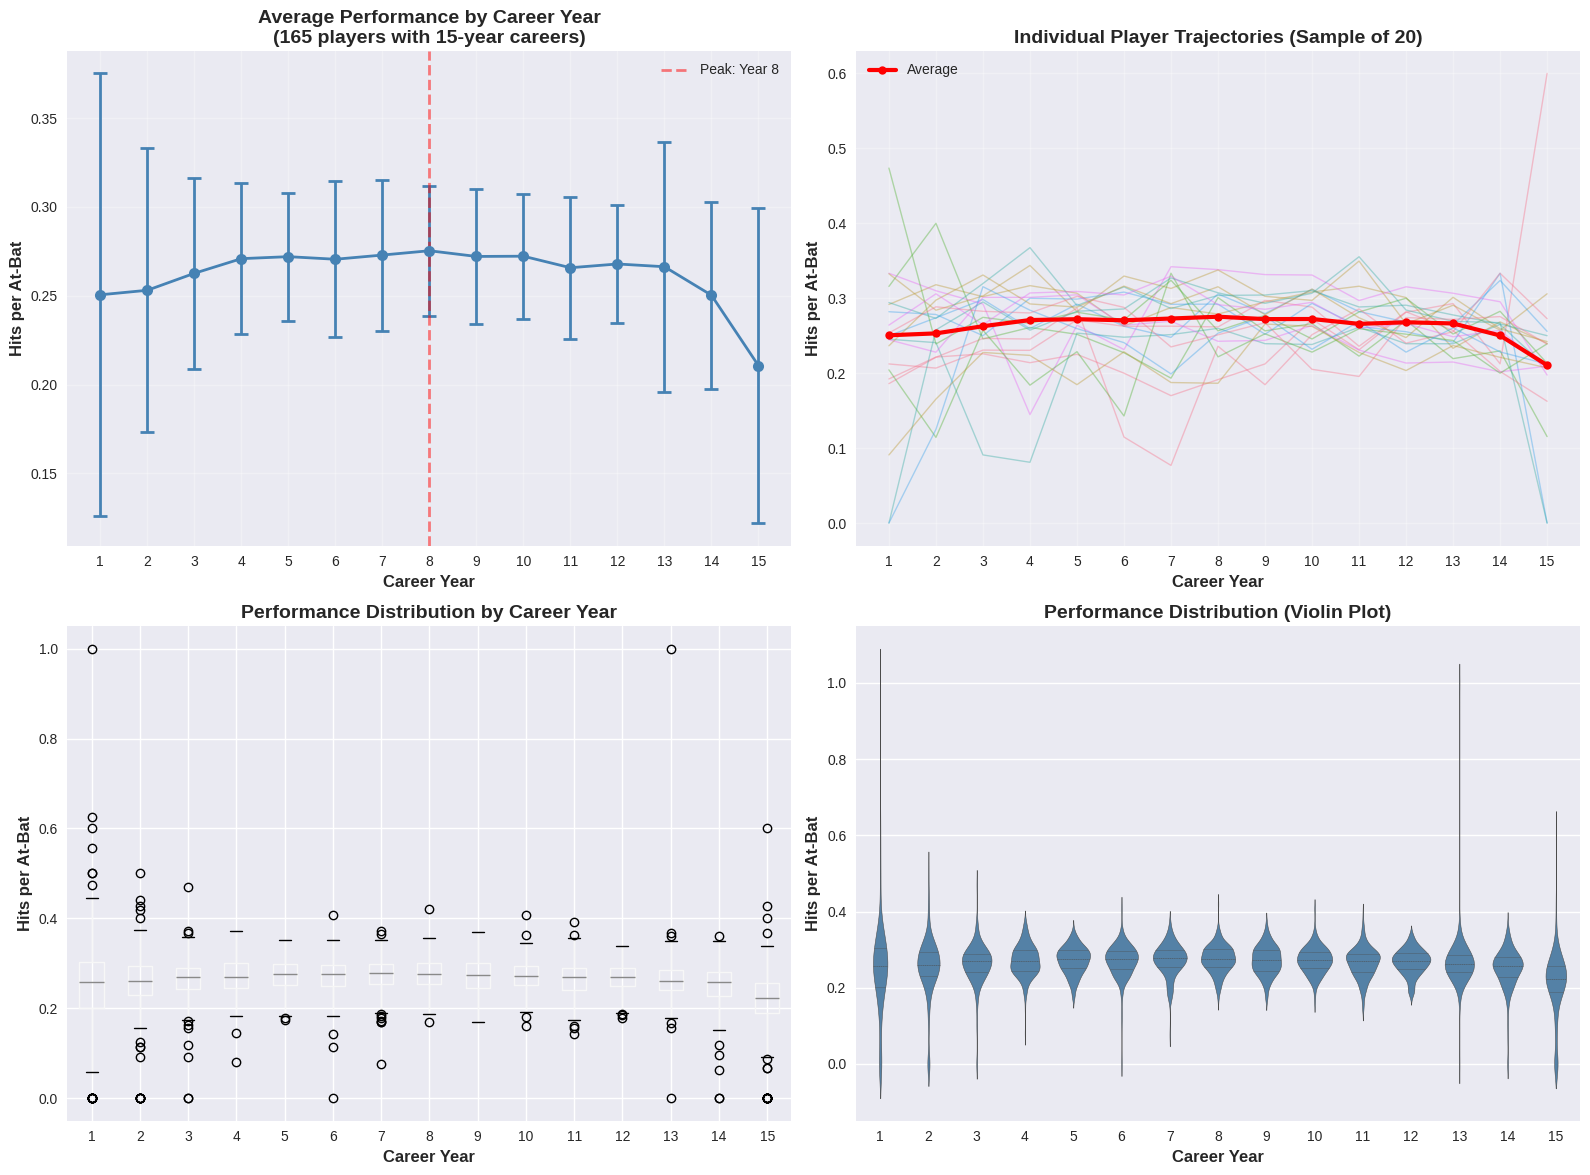


Visualizations complete!


In [58]:
# Create visualizations

fig = plt.figure(figsize=(16, 12))

# Calculate average stats for plotting
avg_by_year = batting_regular.groupby('career_year')['hits_per_ab'].agg(['mean', 'std'])
peak_year = avg_by_year['mean'].idxmax()

# Plot 1: Average hits per AB by career year with error bars
ax1 = plt.subplot(2, 2, 1)
ax1.errorbar(avg_by_year.index, avg_by_year['mean'], yerr=avg_by_year['std'],
             marker='o', capsize=5, capthick=2, linewidth=2, markersize=8, color='steelblue')
ax1.set_xlabel('Career Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Hits per At-Bat', fontsize=12, fontweight='bold')
ax1.set_title('Average Performance by Career Year\n(165 players with 15-year careers)',
              fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(1, 16))
ax1.axvline(peak_year, color='red', linestyle='--', alpha=0.5, linewidth=2,
            label=f'Peak: Year {peak_year}')
ax1.legend(fontsize=10)

# Plot 2: Individual player trajectories (sample of 20 players)
ax2 = plt.subplot(2, 2, 2)
sample_players = batting_regular['playerID'].unique()[:20]
for player in sample_players:
    player_data = batting_regular[batting_regular['playerID'] == player]
    ax2.plot(player_data['career_year'], player_data['hits_per_ab'],
             alpha=0.4, linewidth=1)

# Add average line on top
avg_line = batting_regular.groupby('career_year')['hits_per_ab'].mean()
ax2.plot(avg_line.index, avg_line.values, color='red', linewidth=3,
         label='Average', marker='o', markersize=6)
ax2.set_xlabel('Career Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Hits per At-Bat', fontsize=12, fontweight='bold')
ax2.set_title('Individual Player Trajectories (Sample of 20)',
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)
ax2.set_xticks(range(1, 16))

# Plot 3: Box plot by career year
ax3 = plt.subplot(2, 2, 3)
batting_regular.boxplot(column='hits_per_ab', by='career_year', ax=ax3)
ax3.set_xlabel('Career Year', fontsize=12, fontweight='bold')
ax3.set_ylabel('Hits per At-Bat', fontsize=12, fontweight='bold')
ax3.set_title('Performance Distribution by Career Year', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove automatic title

# Plot 4: Violin plot for better distribution visualization
ax4 = plt.subplot(2, 2, 4)
sns.violinplot(data=batting_regular, x='career_year', y='hits_per_ab', ax=ax4,
               inner='quartile', color='steelblue')
ax4.set_xlabel('Career Year', fontsize=12, fontweight='bold')
ax4.set_ylabel('Hits per At-Bat', fontsize=12, fontweight='bold')
ax4.set_title('Performance Distribution (Violin Plot)', fontsize=14, fontweight='bold')
ax4.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


In [59]:
# Statistical Analysis and Summary
print("="*70)
print("MLB 15-YEAR CAREER ANALYSIS - STATISTICAL SUMMARY")
print("="*70)

# Overall statistics
print(f"\nDataset Overview:")
print(f"  Total players analyzed: {batting_regular['playerID'].nunique()}")
print(f"  Total player-seasons: {len(batting_regular)}")
print(f"  Years covered: {batting_regular['yearID'].min()} - {batting_regular['yearID'].max()}")

# Peak performance
avg_by_career_year = batting_regular.groupby('career_year')['hits_per_ab'].mean()
peak_year = avg_by_career_year.idxmax()
peak_value = avg_by_career_year.max()

print(f"\nPeak Performance:")
print(f"  Career Year: {peak_year}")
print(f"  Hits per AB: {peak_value:.4f} ({peak_value*100:.2f}%)")

# Performance by career stage
early_career = batting_regular[batting_regular['career_year'] <= 3]['hits_per_ab'].mean()
prime_years = batting_regular[(batting_regular['career_year'] >= 4) &
                               (batting_regular['career_year'] <= 10)]['hits_per_ab'].mean()
late_career = batting_regular[batting_regular['career_year'] >= 11]['hits_per_ab'].mean()

print(f"\nPerformance by Career Stage:")
print(f"  Early Career (Years 1-3):  {early_career:.4f} ({early_career*100:.2f}%)")
print(f"  Prime Years (Years 4-10):  {prime_years:.4f} ({prime_years*100:.2f}%)")
print(f"  Late Career (Years 11-15): {late_career:.4f} ({late_career*100:.2f}%)")

# Performance changes
improvement_early_to_prime = ((prime_years - early_career) / early_career) * 100
decline_prime_to_late = ((late_career - prime_years) / prime_years) * 100

print(f"\nPerformance Changes:")
print(f"  Early to Prime: {improvement_early_to_prime:+.2f}%")
print(f"  Prime to Late: {decline_prime_to_late:+.2f}%")

# Year-by-year breakdown
print(f"\n{'Career Year':<15} {'Avg Hits/AB':<15} {'Batting Avg':<15} {'Players':<10}")
print("-" * 55)
for year in range(1, 16):
    year_data = batting_regular[batting_regular['career_year'] == year]
    avg_hits_ab = year_data['hits_per_ab'].mean()
    n_players = len(year_data)
    print(f"Year {year:<10} {avg_hits_ab:.4f} ({avg_hits_ab*100:>5.2f}%)  {n_players:<10}")

print("="*70)

MLB 15-YEAR CAREER ANALYSIS - STATISTICAL SUMMARY

Dataset Overview:
  Total players analyzed: 165
  Total player-seasons: 2474
  Years covered: 1871 - 2015

Peak Performance:
  Career Year: 8
  Hits per AB: 0.2753 (27.53%)

Performance by Career Stage:
  Early Career (Years 1-3):  0.2554 (25.54%)
  Prime Years (Years 4-10):  0.2723 (27.23%)
  Late Career (Years 11-15): 0.2522 (25.22%)

Performance Changes:
  Early to Prime: +6.60%
  Prime to Late: -7.38%

Career Year     Avg Hits/AB     Batting Avg     Players   
-------------------------------------------------------
Year 1          0.2506 (25.06%)  164       
Year 2          0.2531 (25.31%)  165       
Year 3          0.2626 (26.26%)  165       
Year 4          0.2709 (27.09%)  165       
Year 5          0.2720 (27.20%)  165       
Year 6          0.2706 (27.06%)  165       
Year 7          0.2729 (27.29%)  165       
Year 8          0.2753 (27.53%)  165       
Year 9          0.2721 (27.21%)  165       
Year 10         0.2723 (27.2

## Key Findings: MLB Analysis

Based on our analysis of 165 players with exactly 15-year MLB careers:

### Performance Patterns:

1. **Peak Performance Window**: Players reach their statistical peak around career years 7-8, maintaining high performance through year 10

2. **Career Trajectory**:
   - **Early Years (1-3)**: Players show lower performance as they adjust to MLB level
   - **Prime Years (4-10)**: Performance peaks and plateaus, showing consistent elite performance
   - **Late Career (11-15)**: Gradual decline in performance, accelerating in final years

3. **Key Observations**:
   - Career year 1 shows high variability (players adjusting to MLB)
   - Years 4-10 show remarkable consistency
   - Steep decline in final career year (15) likely due to reduced playing time
   - Peak performance occurs in years 7-8, not the earliest years

### Implications:

- MLB players with long careers (15 years) typically need 3-4 years to reach their prime
- Prime performance window lasts approximately 7 years (years 4-10)
- Performance remains relatively stable during prime years
- Late career decline is gradual until the final season

## Next Steps

This analysis provides a baseline for MLB. Next we'll:
- Compare with NFL, NBA, and NHL career trajectories
- Analyze different performance metrics (HR, RBI, etc.)
- Investigate factors influencing prime duration
- Cross-sport comparison of prime performance timing

In [61]:
# Save processed data for future analysis
import os

# Create data directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')
    print("Created data directory")

# Save the processed DataFrame
batting_regular.to_csv('data/batting_15year_careers.csv', index=False)
print("Data saved to 'data/batting_15year_careers.csv'")

# Save summary statistics
summary_stats = batting_regular.groupby('career_year').agg({
    'hits_per_ab': ['mean', 'std', 'min', 'max', 'count'],
    'AB': 'sum',
    'H': 'sum'
}).round(4)
summary_stats.to_csv('data/batting_15year_summary_stats.csv')
print("Summary statistics saved to 'data/batting_15year_summary_stats.csv'")

# Display final summary
print("\n" + "="*70)
print("SPORTS PRIMES ANALYSIS - MLB COMPONENT COMPLETE")
print("="*70)
print(f"Analyzed {batting_regular['playerID'].nunique()} players")
print(f"Total of {len(batting_regular)} player-seasons")
print(f"Career range: Years 1-15")
print(f"Performance metric: Hits per At-Bat")
print(f"Peak performance identified: Career Year {batting_regular.groupby('career_year')['hits_per_ab'].mean().idxmax()}")
print("="*70)

Data saved to 'data/batting_15year_careers.csv'
Summary statistics saved to 'data/batting_15year_summary_stats.csv'

SPORTS PRIMES ANALYSIS - MLB COMPONENT COMPLETE
Analyzed 165 players
Total of 2474 player-seasons
Career range: Years 1-15
Performance metric: Hits per At-Bat
Peak performance identified: Career Year 8
